In [1]:
#Importing Required Libraries 
import pandas as pd 
import numpy as np 
from numpy import nan as NA 
from pandas import DataFrame, Series 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
#Reading Bank Dataset excel file
df=pd.read_csv('~/Downloads/MRP-22072018/bank/bank-full copy.csv')

In [3]:
#Converting Categorical columns to numerical
for columnName in df.columns:
    if(df[columnName].dtype == 'object'):
        df[columnName]= df[columnName].astype('category')
        df[columnName] = df[columnName].cat.codes

In [4]:
#Models built with 6 Variables 
#split of Train-Test
df2=df.copy(deep=True)
df2=df2[['housing','contact','duration','pdays','previous','poutcome', 'y', 'month']]
df_Backup=df2.copy(deep=True)

In [5]:
from sklearn.cross_validation import train_test_split
#label = df2.pop('y')
#data_train, data_test, label_train, label_test = train_test_split(df2, label, test_size = 0.2, random_state = 123)
data_train, data_test = train_test_split(df2, test_size = 0.2, random_state = 0)

/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Upsampling for minor classes
from sklearn.utils import resample
df=data_train.copy(deep=True)

# Separate majority and minority classes
df_majority = df[df.y==0]
df_minority = df[df.y==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=4226, random_state=123) # reproducible results
 
# Combining minor class with downsampled major class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
#df_downsampled.y.value_counts()
data_train=df_downsampled.copy(deep=True)
df_Backup=data_train.copy(deep=True)

In [7]:
#creating backup of the dataframe for furthur use
data_train_Backup=data_train.copy(deep=True)
data_test_Backup=data_test.copy(deep=True)

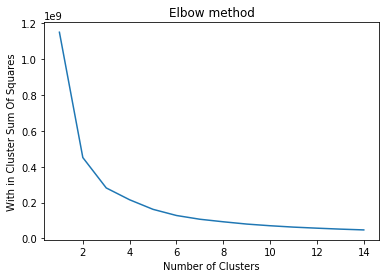

In [8]:
X=data_train_Backup.copy(deep=True)

from sklearn.cluster import KMeans
WithinClusterSumOfSquares = []

for j in range(1,15):
    kmeans = KMeans(n_clusters = j, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    WithinClusterSumOfSquares.append(kmeans.inertia_)

plt.plot(range(1,15), WithinClusterSumOfSquares)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('With in Cluster Sum Of Squares')
plt.show()

In [9]:
from sklearn import tree
from sklearn.cluster import KMeans

X=data_train_Backup.copy(deep=True)
NumberOfClusters=3

data_train=X.copy(deep=True)
train_month=data_train.month
train_y=data_train.y

data_train=data_train.drop('month', axis=1)
data_train=data_train.drop('y', axis=1)

data_train.head()
data_train_kmeans=data_train.copy(deep=True)

In [10]:
kmeans = KMeans(n_clusters=NumberOfClusters, random_state=123).fit(data_train)
data_train['Clust']=kmeans.labels_
data_train_cluster_month=data_train.copy(deep=True)
data_train_cluster_month['y']=train_y
data_train_cluster_month['month']=train_month
data_train.head()

,housing,contact,duration,pdays,previous,poutcome,Clust
11139,1,2,34,-1,0,3,0
30123,1,0,157,268,2,0,0
6679,1,2,199,-1,0,3,0
25514,1,0,76,-1,0,3,0
39215,1,0,695,-1,0,3,1


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

for y in range(0, NumberOfClusters):
    
    print("Cluster :", y)
    df3=data_train_cluster_month.copy(deep=True)
    df3 = df3[df3['Clust'] == y] #y is the cluster number
    label_df3=df3['y']
    df3=df3.drop('Clust', axis=1)
    df3=df3.drop('month', axis=1)
    df3=df3.drop('y', axis=1)
    
    #print(df3.head())
    
    rfc = RandomForestClassifier()
    rfc.fit(df3, label_df3)
    
    predictions = rfc.predict(df3)
    
    df3['pred']=predictions
    df3['month']=train_month
    #print(df3.head())
    
    print("Yes")
    df4 = df3[df3['pred'] == 1]
    label_df4=df4['month']
    df4=df4.drop('month', axis=1)
    df4=df4.drop('pred', axis=1)
    print(df4.head())
    
    rfc_month = LogisticRegression()
    rfc_month.fit(df4, label_df4)
    
    predictions = rfc_month.predict(df4)
    df4['pred_month']=predictions
    #print(df4.head())
    print()
    
    print("No")
    df5 = df3[df3['pred'] == 0]
    label_df5=df5['month']
    df5=df5.drop('month', axis=1)
    df5=df5.drop('pred', axis=1)
    #print(df4.head())
    
    rfc_month = LogisticRegression()
    rfc_month.fit(df5, label_df5)
    
    predictions = rfc_month.predict(df5)
    df5['pred_month']=predictions
    #print(df5.head())
    
    print()
    print()


Cluster : 0
Yes
       housing  contact  duration  pdays  previous  poutcome
16778        0        0       318     -1         0         3
27579        0        0       229     -1         0         3
32752        1        0       372     -1         0         3
14929        1        0       285     -1         0         3
9240         1        2       412     -1         0         3

No


Cluster : 1
Yes
       housing  contact  duration  pdays  previous  poutcome
39215        1        0       695     -1         0         3
16531        1        0       799     -1         0         3
16418        0        0       517     -1         0         3
11059        0        2       637     -1         0         3
37065        1        0       628     -1         0         3

No


Cluster : 2
Yes
       housing  contact  duration  pdays  previous  poutcome
2649         1        2      1052     -1         0         3
11635        0        2      2635     -1         0         3
14162        1        0  

In [12]:
data_train_kmeans.head()

,housing,contact,duration,pdays,previous,poutcome
11139,1,2,34,-1,0,3
30123,1,0,157,268,2,0
6679,1,2,199,-1,0,3
25514,1,0,76,-1,0,3
39215,1,0,695,-1,0,3


In [13]:
#df13=data_test_Backup
#df13['pred']
#df13['pred_month']
#df13=df13[0:0]

In [14]:
df13=data_test
df13['pred_month']=1
df13['pred']=1
df13=df13[0:0]

df12=data_test
df12['pred_month']=1
df12['pred']=1
df12=df12[0:0]

/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

# testing

In [15]:
data_test_kmeans=data_test_Backup.copy(deep=True)
data_label_y=data_test_Backup['y']
data_label_month=data_test_Backup['month']
data_test_kmeans=data_test_kmeans.drop('month', axis=1)
data_test_kmeans=data_test_kmeans.drop('y', axis=1)
data_test_kmeans.head()
#data_test_kmeans['Clust']= kmeans.predict(data_train_kmeans)

,housing,contact,duration,pdays,previous,poutcome
14001,1,0,91,-1,0,3
32046,1,0,1073,-1,0,3
13318,0,1,243,-1,0,3
42991,1,0,105,188,2,0
14237,1,0,332,-1,0,3


In [16]:
a=kmeans.predict(data_test_kmeans)
data_test_kmeans['Clust']=a
data_test_kmeans['y']=data_label_y
data_test_kmeans.head()

,housing,contact,duration,pdays,previous,poutcome,Clust,y
14001,1,0,91,-1,0,3,0,0
32046,1,0,1073,-1,0,3,2,1
13318,0,1,243,-1,0,3,0,0
42991,1,0,105,188,2,0,0,0
14237,1,0,332,-1,0,3,0,0


In [17]:
data_test_kmeans['month']=data_label_month
data_test_kmeans.head()

,housing,contact,duration,pdays,previous,poutcome,Clust,y,month
14001,1,0,91,-1,0,3,0,0,5
32046,1,0,1073,-1,0,3,2,1,0
13318,0,1,243,-1,0,3,0,0,5
42991,1,0,105,188,2,0,0,0,3
14237,1,0,332,-1,0,3,0,0,5


In [18]:
for y in range(0, NumberOfClusters):
    #print("Cluster :", y)
    df7=data_test_kmeans.copy(deep=True)
    df7 = df7[df7['Clust'] == y] #y is the cluster number
    label_df7=df7['y']
    df7_clust=df7['Clust']
    df7_month=df7['month']
    df7=df7.drop('Clust', axis=1)
    df7=df7.drop('month', axis=1)
    df7=df7.drop('y', axis=1)
    
    #print(df3.head())
    
    predictions = rfc.predict(df7)
    
    df7['pred']=predictions
    df7['month']=df7_month
    df7['Clust']=df7_clust
    df7['y']=label_df7
    
    #print(df7.head())
    
    print("count of df 7 :", len(df7))
    
    #print("Yes")
    df8 = df7[df7['pred'] == 1]
    #print("count of df 8 :", len(df8))
    
    label_df8=df8['month']
    
    df8_clust=df8['Clust']
    df8_pred=df8['pred']
    
    df8=df8.drop('month', axis=1)
    df8=df8.drop('pred', axis=1)
    df8=df8.drop('Clust', axis=1)
    df8=df8.drop('y', axis=1)

    #print(df8.head())
    
    predictions = rfc_month.predict(df8)
    
    df8['pred']=df8_pred
    df8['y']=label_df8
    
    df8['pred_month']=predictions

    df8['month']=label_df8
    
    
    #print(df8.head())
    #print(len(df8))
    df12 = df12.append(df8[:])
    #print("count of df 12 :", len(df12))
    #print()
    
    #print("No")
    df9 = df7[df7['pred'] == 0]
    #print("count of df 9 :", len(df9))
    label_df9=df9['month']
    
    df9_clust=df9['Clust']
    df9_pred=df9['pred']
    
    df9=df9.drop('month', axis=1)
    df9=df9.drop('pred', axis=1)
    df9=df9.drop('Clust', axis=1)
    df9=df9.drop('y', axis=1)

    #print(df8.head())
    
    predictions = rfc_month.predict(df9)
    
    df9['pred']=df9_pred
    df9['y']=label_df9
    
    df9['pred_month']=predictions

    df9['month']=label_df9
    #print(df9.head())
    #print(len(df9))
    df13 = df13.append(df9[:])
    #print("count of df 13 :", len(df13))

    print()
    

count of df 7 : 7519

count of df 7 : 1294

count of df 7 : 230



/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

PrecisionScore=precision_score(df12['month'], df12['pred_month'], average='weighted')
RecallScore=recall_score(df12['month'], df12['pred_month'], average='weighted')
FScore=f1_score(df12['month'], df12['pred_month'], average='weighted')    

print("Performance measures of Model predicting Month when value of Y is YES")
print("precision_score: ",PrecisionScore)
print("Recall_score: ",RecallScore)
print("F1 score: ",FScore)
print()

Performance measures of Model predicting Month when value of Y is YES
precision_score:  0.3838150119881151
Recall_score:  0.3807083983069726
F1 score:  0.3350444864234604



/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

PrecisionScore=precision_score(df13['month'], df13['pred_month'], average='weighted')
RecallScore=recall_score(df13['month'], df13['pred_month'], average='weighted')
FScore=f1_score(df13['month'], df13['pred_month'], average='weighted')    

print("Performance measures of Model predicting Month when value of Y is NO")
print("precision_score: ",PrecisionScore)
print("Recall_score: ",RecallScore)
print("F1 score: ",FScore)
print()

Performance measures of Model predicting Month when value of Y is NO
precision_score:  0.21113065728450345
Recall_score:  0.2
F1 score:  0.17911735700197237



/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/harneetkaur/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
